In [3]:
import random
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Seed for reproducibility
random.seed(42)
np.random.seed(42)

# --- Step 1: Simulate 150+ guest booking scenarios for a simple Agentic AI in Hospitality ---

# Room types and pricing ranges
room_types = ['Standard', 'Deluxe', 'Suite']
base_prices = {'Standard': 100, 'Deluxe': 150, 'Suite': 250}

# Guest goals and loyalty tiers
guest_goals = ['relax', 'explore', 'work']
loyalty_tiers = ['None', 'Silver', 'Gold']

# Simulate data for 150 guests
num_guests = 150
start_date = datetime.today()
data = []

for i in range(num_guests):
    guest_name = f"Guest_{i+1}"
    goal = random.choice(guest_goals)
    loyalty = random.choices(loyalty_tiers, weights=[0.4, 0.35, 0.25])[0]
    preferred_room = random.choice(room_types)
    booking_day = start_date + timedelta(days=random.randint(0, 29))
    
    # Adjust price slightly based on day and room type
    base_price = base_prices[preferred_room]
    seasonal_multiplier = 1 + (booking_day.weekday() in [4, 5]) * 0.1  # 10% weekend bump
    loyalty_discount = {'None': 0, 'Silver': 0.05, 'Gold': 0.1}[loyalty]
    
    final_price = base_price * seasonal_multiplier * (1 - loyalty_discount)
    
    data.append({
        'guest_name': guest_name,
        'goal': goal,
        'loyalty_tier': loyalty,
        'preferred_room': preferred_room,
        'booking_date': booking_day.strftime("%Y-%m-%d"),
        'base_price': base_price,
        'loyalty_discount': loyalty_discount,
        'final_price': round(final_price, 2)
    })

# Convert to DataFrame
guest_df = pd.DataFrame(data)
guest_df.head()
guest_df.to_csv('loyalty.csv')


In [5]:
guest_df.head()

,guest_name,goal,loyalty_tier,preferred_room,booking_date,base_price,loyalty_discount,final_price
0,Guest_1,work,None,Suite,2025-06-27,250,0.00,275.00
1,Guest_2,relax,None,Suite,2025-06-22,250,0.00,250.00
2,Guest_3,work,Silver,Suite,2025-06-21,250,0.05,261.25
3,Guest_4,work,Silver,Standard,2025-06-21,100,0.05,104.50
4,Guest_5,relax,None,Suite,2025-06-19,250,0.00,250.00


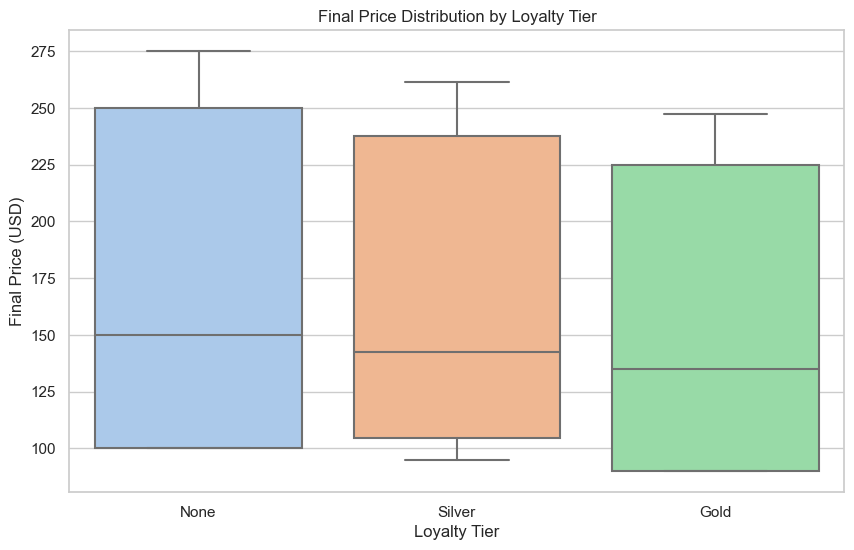

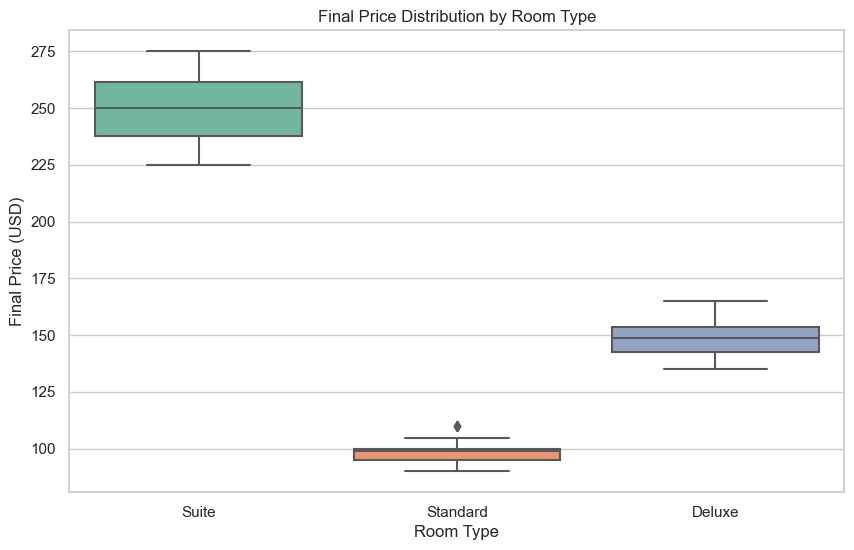

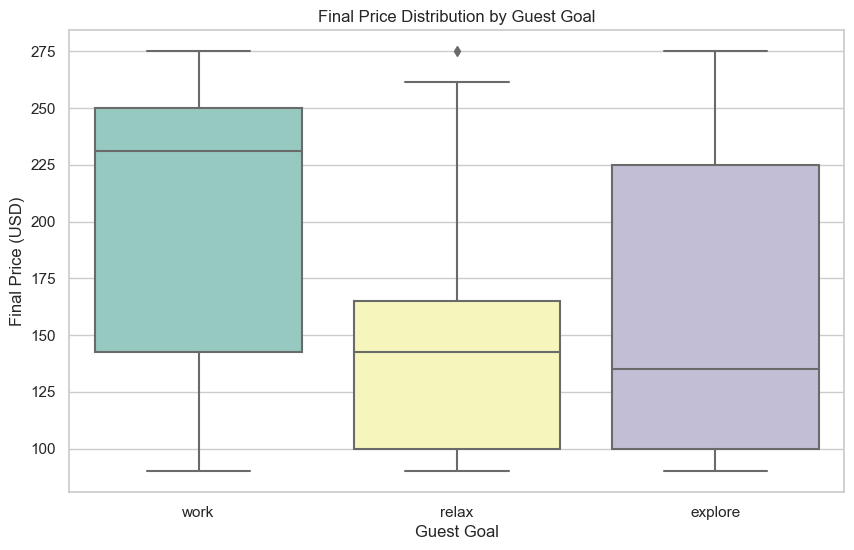

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic data
df = pd.read_csv("loyalty.csv")

# Set up plotting style
sns.set(style="whitegrid")

# Plot 1: Loyalty Tier vs Final Price
plt.figure(figsize=(10, 6))
sns.boxplot(x="loyalty_tier", y="final_price", data=df, palette="pastel")
plt.title("Final Price Distribution by Loyalty Tier")
plt.xlabel("Loyalty Tier")
plt.ylabel("Final Price (USD)")
plt.show()

# Plot 2: Room Type vs Final Price
plt.figure(figsize=(10, 6))
sns.boxplot(x="preferred_room", y="final_price", data=df, palette="Set2")
plt.title("Final Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Final Price (USD)")
plt.show()

# Plot 3: Guest Goal vs Final Price
plt.figure(figsize=(10, 6))
sns.boxplot(x="goal", y="final_price", data=df, palette="Set3")
plt.title("Final Price Distribution by Guest Goal")
plt.xlabel("Guest Goal")
plt.ylabel("Final Price (USD)")
plt.show()
